# Feedfoward Multilayer perceptron 

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageOps

In [2]:
import sys
sys.path.append('..')

from data import MNIST
from multilayer_perceptron import MLP
from multilayer_perceptron.layers import InputLayer, DenseLayer, OutputLayer
from multilayer_perceptron.activations import tanh, softmax, identity
from multilayer_perceptron.costs import mean_square_cost

## Load dataset

In [3]:
def one_hot_encode(data):
    encoded = np.zeros([len(data), 10])
    for i in range(len(data)):
        encoded[i, data[i]] = 1
    return encoded

In [4]:
mnist_dataset = MNIST()
train_data, validation_data, test_data = mnist_dataset.load()

train_data = (
  train_data[0] / 255,
  one_hot_encode(train_data[1])
)

validation_data = (
  validation_data[0] / 255,
  one_hot_encode(validation_data[1])
)

test_data = (
  test_data[0] / 255,
  one_hot_encode(test_data[1])
)

## Neural Network

In [5]:
mlp = MLP()
mlp.add(InputLayer(784))
mlp.add(DenseLayer(30, tanh))
mlp.add(OutputLayer(10, softmax, mean_square_cost))
mlp.initialize_random_weights()
mlp.fit(
  train_data=train_data,
  epochs=30,
  learning_rate=0.1,
  batch_size=10,
  validation_data=validation_data
)

Epoch: 29/30	Train: 0.060 | 0.900	Valid: 0.072 | 0.905

## Tests

In [7]:
def get_random(data):
    xdata, ydata = data
    random = int(np.random.random() * len(xdata))
    image = xdata[random]
    label = np.argmax(ydata[random])
    return image, label

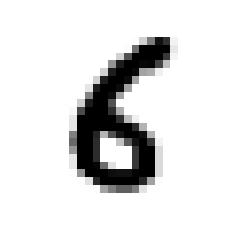

I think it's a 6!
(Answer: 6)


In [43]:
image, label = get_random(test_data)

plt.imshow(image.reshape((28, 28)))
plt.set_cmap(plt.cm.binary)
plt.axis('off')
plt.show()

mlp.feedfoward(np.atleast_2d(image))
predict = np.argmax(mlp.layers[-1].output)
print(f'\033[1mI think it\'s a {predict}!\033[0m')
print(f'(Answer: {label})')